# Working with PyTorch 

-> https://pythonprogramming.net/introduction-deep-learning-neural-network-pytorch/ 

What's a tensor?!

You can just think of a tensor like an array. Really all we're doing is basically multiplying arrays here. That's all there is to it. The fancy bits are when we run an optimization algorithm on all those weights to start modifying them. Neural networks themselves are actually super basic and simple. Their optimization is a little more challenging, but most of these deep learning libraries also help you a bit with that math. If you want to learn how to do everything yourself by hand, stay tuned later in the series. I just don't think it would be wise to lead with that.

## Playing around with PyTorch 

In [1]:
# standard imports 

import torch 

# tensors are like arrays so...

x = torch.Tensor([5,3]) # establishes a 1 by 2 array with values 5 and 3 
y = torch.Tensor([2,1]) # establises a 1 by 2 array with values 2 and 1 

print(x*y) # multiplies the corresponding values 

tensor([10.,  3.])


In [2]:
x = torch.zeros([2,5]) # creates a two (row) by 5 (column) array filled with zeros. 
x_shape = x.shape # outputs the row by column 
y = torch.rand([2,5]) # creates a two by 5 array filled with random digits between 0 and 1. 

print("Printing Array Zeros: " + str(x))
print("Rows, Columns Size: " + str(x_shape))
print("Random Tensor: " + str(y))

Printing Array Zeros: tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
Rows, Columns Size: torch.Size([2, 5])
Random Tensor: tensor([[0.0025, 0.5771, 0.9220, 0.4199, 0.7805],
        [0.8364, 0.4441, 0.3622, 0.1998, 0.4067]])


In [3]:
visible_y = y.view([1,10]) # for the first ten values 
visible_y

tensor([[0.0025, 0.5771, 0.9220, 0.4199, 0.7805, 0.8364, 0.4441, 0.3622, 0.1998,
         0.4067]])

## Working with Neural Networks 

In [14]:
# standard imports

import torch 
import torchvision # collection to benchmark with vision tasks 
import matplotlib.pyplot as plt

from torchvision import transforms, datasets



First, we need a dataset. Next, we need to handle for how we're going to iterate over that dataset. 

Training and Testing data split
To train any machine learning model, we want to first off have training and validation datasets. This is so we can use data that the machine has never seen before to "test" the machine.

Shuffling
Then, within our training dataset, we generally want to randomly shuffle the input data as much as possible to hopefully not have any patterns in the data that might throw the machine off.

For example, if you fed the machine a bunch of images of zeros, the machine would learn to classify everything as zero. Then you'd start feeding it ones, and the machine would figure out pretty quick to classify everything as ones...and so on. Whenever you stop, the machine would probably just classify everything as the last thing you trained on. If you shuffle the data, your machine is much more likely to figure out what's what.

Scaling and normalization
Another consideration at some point in the pipeline is usually scaling/normalization of the dataset. In general, we want all input data to be between zero and one. Often many datasets will contain data in ranges that are not within this range, and we generally will want to come up with a way to scale the data to be within this range.

In [15]:
# data set implementation from library 

import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

# kernel crashes 

train = datasets.MNIST('', train=True, download=True,
            transform=transforms.Compose([
                transforms.ToTensor()
            ]))

test = datasets.MNIST('', train=False, download=True,
            transform=transforms.Compose([
                transforms.ToTensor()
            ]))



In [16]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle= True)

In [17]:
for data in trainset: 
    print(data) 
    break 

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [18]:
x,y = data[0][0], data[1][0]
print(y)

tensor(1)


In [19]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


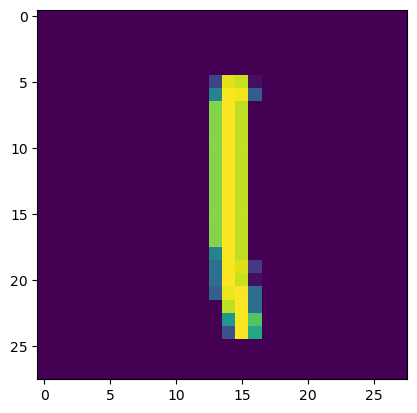

In [20]:
plt.imshow(data[0][0].view(28,28))
plt.show()

In [21]:
# balancing data set 
total = 0 
counter_dict = {0:0, 1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}

By "balance," I mean make sure there are the same number of examples for each classifications in training.

Sometimes, this simply isn't possible. There are ways for us to handle for this with special class weighting for the optimizer to take note of, but, even this doesn't always work. Personally, I've never had success with this in any real world application.

In our case, how might we confirm the balance of data? Well, we just need to iterate over everything and make a count.

In [ ]:
for data in trainset: 
    Xs, ys = data 
    for y in ys: 
        counter_dict[int(y)] += 1
        total += 1 

print(counter_dict)

for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100.0}%")

# what this does is to print out the percentages of each number within the training data set 

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
0: 9.871666666666666%
1: 11.236666666666666%
2: 9.93%
3: 10.218333333333334%
4: 9.736666666666666%
5: 9.035%
6: 9.863333333333333%
7: 10.441666666666666%
8: 9.751666666666667%
9: 9.915000000000001%


# Now we will be making our neural network model.

Previously, we were just playing and importing the datasets. 


In [23]:
import torch.nn as nn
import torch.nn.functional as F

The torch.nn import gives us access to some helpful neural network things, such as various neural network layer types (things like regular fully-connected layers, convolutional layers (for imagery), recurrent layers...etc). For now, we've only spoken about fully-connected layers, so we will just be using those for now.

The torch.nn.functional area specifically gives us access to some handy functions that we might not want to write ourselves. We will be using the relu or "rectified linear" activation function for our neurons. Instead of writing all of the code for these things, we can just import them, since these are things everyone will be needing in their deep learning code.

In [33]:
class Net(nn.Module): # few lines of code for neural network that can pass data with an output 

    def __init__(self): # initializes the self, super, and layers 
        super().__init__() # sub class inherits the attributes and methods of the nn.module 
        self.layer1 = nn.Linear(28*28, 64) # first layer takes in 28 x 28 images with outputs 64 connections 
        self.layer2 = nn.Linear(64, 64) # second layer takes the output from the previous layer
        self.layer3 = nn.Linear(64,64) # third layer is meant to repeat 
        self.layer4 = nn.Linear(64, 10) # 10 neurons for 10 classes  

    def forward(self, x): # needs to be called forward just inputs the inputs to feed forward through activation function
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x)) 
        x = self.layer4(x) 
        return F.log_softmax(x, dim=1) 

net = Net() # calls the class Net's function operations 
print(net) 


Net(
  (layer1): Linear(in_features=784, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=64, bias=True)
  (layer4): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
# random testing of net () 

X = torch.randn((28,28)) # random digits 
X = X.view(-1,28*28) # -1 suggests any size 
output = net(X) 
output # tensor with a tensor of our 10 possible classes, sort of pointless without backpropagation

tensor([[-2.5371, -2.3832, -2.1664, -2.3416, -2.3503, -2.3378, -2.2496, -2.1220,
         -2.2647, -2.3341]], grad_fn=<LogSoftmaxBackward0>)

# Appendix 

In [24]:
# demo of super and classes: 

class a:
    '''Will be a parent class'''
    def __init__(self):
        print("initializing a")

class b(a):
    '''Inherits from a, but does not run a's init method '''
    def __init__(self):
        print("initializing b")

class c(a):
    '''Inhereits from a, but DOES run a's init method'''
    def __init__(self):
        super().__init__()
        print("initializing c")

b_ob = b()

initializing b


In [25]:
c_ob = c()

initializing a
initializing c
